## *1. Postprocessing and Analysis Notebook*

#### Count files in a directory

In [ ]:
#Function to count files in a directory
def count_files(folder_path):
    count = 0
    for _, _, files in os.walk(folder_path):
        count += len(files)
    return count

#### Load images from folder

In [ ]:
#Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

### Find last created folder in \detect directory




In [ ]:
#Find the last created folder in detection output
#In YOLO folders the detection output is often a newly created folder in the directory where detection runs are saved
#The main objective of this function is to find the latest folder in detection runs output directory

def Latest_folder():
    #Go to \detect directory
    %cd \path\to\detection\output

    #get all subdirectories in detect folder of YOLO
    all_subdirs = [d for d in os.listdir('.') if os.path.isdir(d)]
    #print(all_subdirs)

    #find the last created folder
    latest_subdir = max(all_subdirs, key=os.path.getmtime)
    #print(latest_subdir)

    #change current directory to the last created folder
    os.chdir(latest_subdir)

    return latest_subdir

### Find text




In [ ]:
 #Function to List and return the names of all .txt files within a specified subdirectory
def folder_filenames(target):
    #try to change directory again to last exp (in case it was not successfuly updated in the previous function)
    try:
        os.chdir(target)
    except:
        pass

    inputlst = [os.listdir('labels')]
    filenamelist = []

    for filename in os.listdir('labels'):
        if filename.endswith(".txt"):
            filenamelist.append(filename)
    return filenamelist

### Count instances from txt files


In [ ]:
# Function to read all text files in the current directory, to count the number of lines starting with '0' (live) and '1' (dead) in each file,
# and returns two lists: one with the live counts and another with the dead counts for each file.
def Read_txtboundingBoxes():
    live_count=[]
    dead_count=[]
    #Loop over text files in folder
    for filename in glob.glob(os.path.join(os.getcwd(),'*.txt')):
        #open file and read lines
        with open(filename,'r') as f:
            live = 0
            dead = 0
            #read contents of each file
            text =f.readlines()
            #read line by line
            for line in text:
                #first character in each line
                this_class=line[0]
                if this_class.isnumeric():
                    if int(this_class) == 0:
                        live= live+1
                    elif int(this_class)==1:
                        dead = dead+1
            live_count.append(live)
            dead_count.append(dead)
    return live_count,dead_count

#### List average

In [ ]:
#Calculate list average
def list_avg(L):
    sum = 0
    for i in L:
        sum = sum+i
    avg = int(sum / len(L))
    return avg

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-1-b526b6e8fb02>, line 2)

#### Cell Count averages

In [ ]:
#Calculate list average per one corner(Neubauer chamber)
def list_avg_per_corner(L):

    acq_count = count_files(dir_Acquisition)
    crops_count = count_files(dir_cropped)
    #no of crops per corner
    n = int(crops_count/acq_count)

    averages = []

    #L is the list of calculated number of cells
    for i in range(1, len(L), n):
        corner = L[i:i + n]
        average = round(sum(corner) / len(corner))
        averages.append(average)

    return averages

## Count cells from labels

In [ ]:
#Navigate to the latest folder in \detect
last_exp = Latest_folder()
print(last_exp)
%cd last_exp

C:\CellCount\YOLO\OfflineYOLO\yolov5-master\runs\detect
exp36


In [ ]:
#get a list of .txt files in the last exp folder
filenames = folder_filenames(last_exp)
print(folder_filenames(last_exp))

In [ ]:
#Change path to labels folder
os.chdir('labels')

In [ ]:
#Extract and print count results from .txt files
#Call function to count class occurrencies from .txt files
live_count, dead_count = Read_txtboundingBoxes()
print('Live cells:')

print("Count",live_count,"\ n")
print("Average from all corners: Sum/#of corners: ",list_avg(live_count),"\n")
averages_per_corner = list_avg_per_corner(live_count)
print("Average per corner (list) :",averages_per_corner,"\t", "Average",list_avg(averages_per_corner),"\n")

print('Dead cells:')
print("Count",dead_count,"\n")
print("Average from all corners: Sum/#of corners: ",list_avg(dead_count),"\n")
dead_averages_per_corner = list_avg_per_corner(dead_count)
print("Average per corner (list) :",dead_averages_per_corner,"\t", "Average",list_avg(dead_averages_per_corner),"\n")

Live cells:
Count [230, 262, 239, 238, 240, 247, 252, 229, 251, 241, 276, 232] 

Average from all corners: Sum/#of corners:  244 

Average per corner (list) : [246, 246] 	 Average 246 

Dead cells:
Count [4, 7, 6, 6, 4, 4, 5, 7, 3, 3, 5, 3] 

Average from all corners: Sum/#of corners:  4 

Average per corner (list) : [5, 4] 	 Average 4 



Write results to a text file

In [ ]:
with open('Summary.txt', 'w') as f:
    print("Live cells:")
    print("Count",live_count)
    print("Average:",list_avg(live_count))

    print("Dead cells:")
    print("Count", dead_count)
    print("Average:",list_avg(dead_count))
    f.close()

Live cells:
Count [51, 60, 46, 46, 62, 63, 61, 55, 39, 62, 64, 51, 55, 53, 42, 57, 57, 63, 65, 50, 45, 62, 60, 58, 57, 45, 51, 57, 55, 62, 71, 42, 51, 57, 57, 58, 0]
Average: 53
Dead cells:
Count [8, 5, 8, 8, 3, 2, 5, 2, 4, 5, 1, 5, 7, 4, 8, 5, 1, 2, 4, 2, 4, 3, 0, 4, 6, 3, 7, 4, 2, 1, 3, 3, 4, 2, 2, 1, 0]
Average: 3


## Plot results

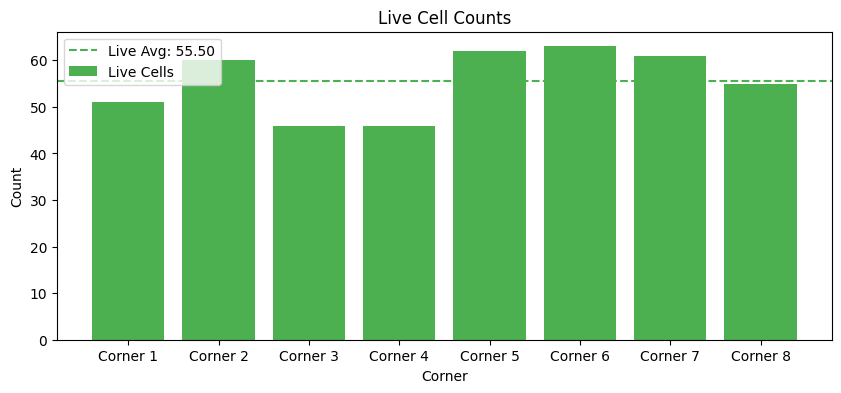

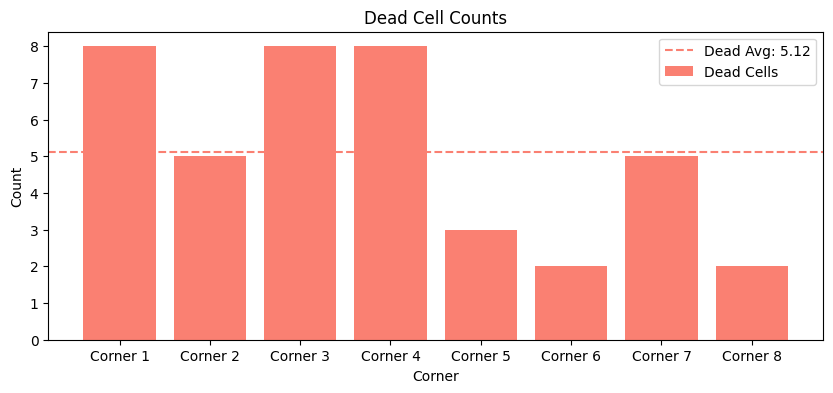

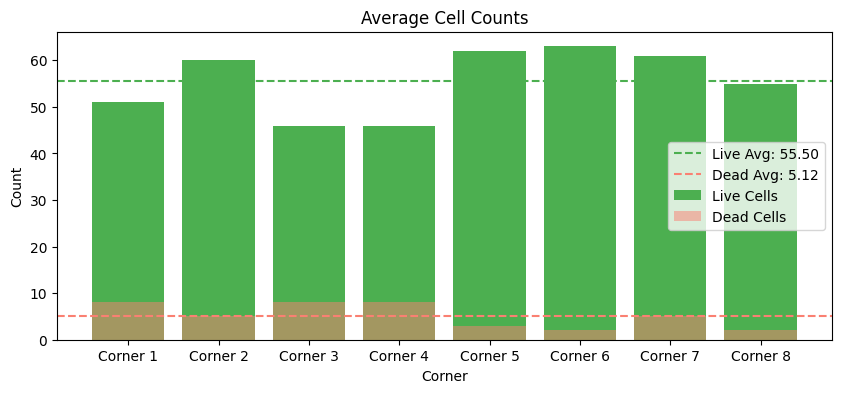

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
live_count = [51, 60, 46, 46, 62, 63, 61, 55]
dead_count = [8, 5, 8, 8, 3, 2, 5, 2]

# Calculate average and standard deviation
live_avg = np.mean(live_count)
live_std = np.std(live_count)
dead_avg = np.mean(dead_count)
dead_std = np.std(dead_count)

# Define colors
live_color = '#4CAF50'  #Green color
dead_color = '#FA8072'  #Orange-Salmon color

# Plotting live cells
plt.figure(figsize=(10, 4))
plt.bar(np.arange(len(live_count)), live_count, color=live_color, label='Live Cells')
plt.xlabel('Corner')
plt.ylabel('Count')
plt.title('Live Cell Counts')
plt.xticks(np.arange(len(live_count)), ['Corner 1', 'Corner 2', 'Corner 3', 'Corner 4', 'Corner 5', 'Corner 6', 'Corner 7', 'Corner 8'])
plt.axhline(y=live_avg, color=live_color, linestyle='--', label='Live Avg: {:.2f}'.format(live_avg))
plt.legend()
plt.show()

# Plotting dead cells
plt.figure(figsize=(10, 4))
plt.bar(np.arange(len(dead_count)), dead_count, color=dead_color, label='Dead Cells')
plt.xlabel('Corner')
plt.ylabel('Count')
plt.title('Dead Cell Counts')
plt.xticks(np.arange(len(dead_count)), ['Corner 1', 'Corner 2', 'Corner 3', 'Corner 4', 'Corner 5', 'Corner 6', 'Corner 7', 'Corner 8'])
plt.axhline(y=dead_avg, color=dead_color, linestyle='--', label='Dead Avg: {:.2f}'.format(dead_avg))
plt.legend()
plt.show()

# Plotting average live and dead cells together
plt.figure(figsize=(10, 4))
plt.bar(np.arange(len(live_count)), live_count, color=live_color, label='Live Cells')
plt.bar(np.arange(len(dead_count)), dead_count, color=dead_color, alpha=0.5, label='Dead Cells')
plt.xlabel('Corner')
plt.ylabel('Count')
plt.title('Average Cell Counts')
plt.xticks(np.arange(len(dead_count)), ['Corner 1', 'Corner 2', 'Corner 3', 'Corner 4', 'Corner 5', 'Corner 6', 'Corner 7', 'Corner 8'])
plt.axhline(y=live_avg, color=live_color, linestyle='--', label='Live Avg: {:.2f}'.format(live_avg))
plt.axhline(y=dead_avg, color=dead_color, linestyle='--', label='Dead Avg: {:.2f}'.format(dead_avg))
plt.legend()
plt.show()